## Finding Arduino Ports
When working with Arduino, it's essential to know which port your Arduino board is connected to on your computer. This is necessary for uploading code and communicating with the board. Each port is identified by a unique name or number, depending on the operating system:

- On Windows, ports are named like `COM3`, `COM4`, etc.
- On macOS and Linux, ports are named like `/dev/ttyUSB0`, `/dev/ttyACM0`, etc.

Run the next cell to know the port number.


In [24]:
import serial.tools.list_ports

def list_all_ports():
    ports = serial.tools.list_ports.comports()

    if not ports:
        print("No serial ports found.")
    else:
        print("Available serial ports:")
        for port in ports:
            print(f"Port: {port.device}, Description: {port.description}")

list_all_ports()

Available serial ports:
Port: COM15, Description: Standard Serial over Bluetooth link (COM15)
Port: COM31, Description: USB Serial Device (COM31)
Port: COM16, Description: Standard Serial over Bluetooth link (COM16)


#### Setup the serial communication with arduino

Change the port value in the next cell with the result that you got in the previous cell

In [25]:
import serial
import time

port = 'COM31' 

ser = serial.Serial(port, 115200)

time.sleep(2)

## Command to read the photo diode data
Use the following command `m3pdcurrent` at the next prompt to start recording the photo diode current.

Sequence of operations:
- Enter the command `m3pdcurrent`
- Wait for 3sec (Wait until you see the text "Received stop command.")
- Block the photo diode by placing the finger on the photo diode
- Enter the command `m3pdcurrent`
- Wait for 3sec (Wait until you see the text "Received stop command.")


In [26]:
import matplotlib.pyplot as plt
import csv

read_data_from_csv = 0

# Initialize empty lists to store each column
pd_current_ambient = []
pd_current_with_finger = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print("Received stop command.")
                    break

                pd_current_ambient.append(line)
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open('diode_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            pd_current_ambient.append(float(row[0])) 
            

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print("Received stop command.")
                    break
                pd_current_with_finger.append(line)
                
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open('diode_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            pd_current_with_finger.append(float(row[0]))

Type your command:


>  m3pdcurrent


Received stop command.
Type your command:


>  m3pdcurrent


Received stop command.


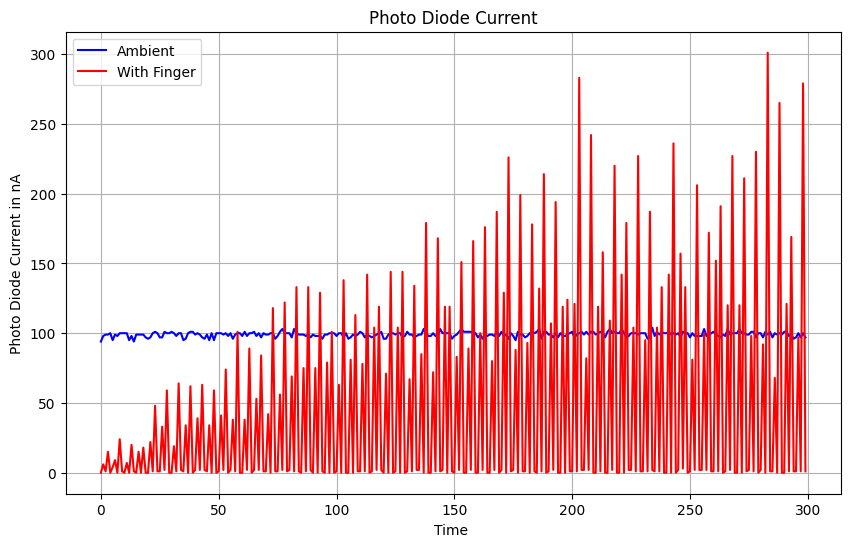

In [27]:
# Convert strings to integers
pd_current_ambient = list(map(int, pd_current_ambient))
pd_current_with_finger = list(map(int, pd_current_with_finger))

# Calculate the difference
difference = [ambient - finger for ambient, finger in zip(pd_current_ambient, pd_current_with_finger)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot ambient and with finger data
plt.plot(pd_current_ambient, label='Without Finger', color='blue')
plt.plot(pd_current_with_finger, label='With Finger', color='red')

# Plot the difference
# plt.plot(difference, label='Difference (Ambient - With Finger)', linestyle='--', color='green')

plt.xlabel('Time ')
plt.ylabel('Photo Diode Current in nA')
plt.title('Photo Diode Current')
plt.legend()
plt.grid(True);
plt.show()


In [28]:
average_pd_current_ambient = sum(pd_current_ambient)/len(pd_current_ambient)
average_pd_current_with_finger = sum(pd_current_with_finger)/len(pd_current_with_finger)

print("Average photo diode current in ambient light:", end = " ")
print(average_pd_current_ambient)
print("Average photo diode with finger placed on it:", end = " ")
print(average_pd_current_with_finger)

Average photo diode current in ambient light: 99.13
Average photo diode with finger placed on it: 46.666666666666664


## Command to read the photo diode current by increasing the LED brightness

Use the following command `m3stepled` at the next prompt to start recording the photo diode current.

Type your command:


>  m3stepled


Reading data .....................................................................................................................................................................................................................................................................................................................................................................................................................
Received stop command.


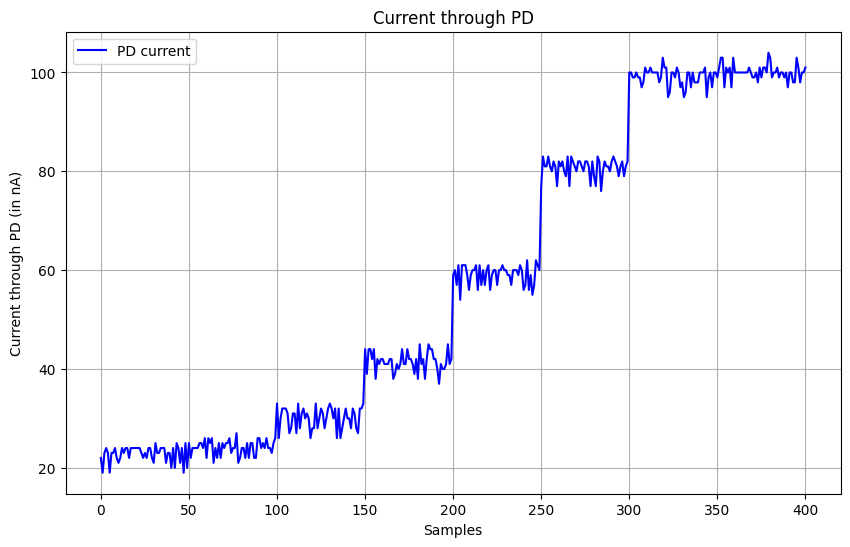

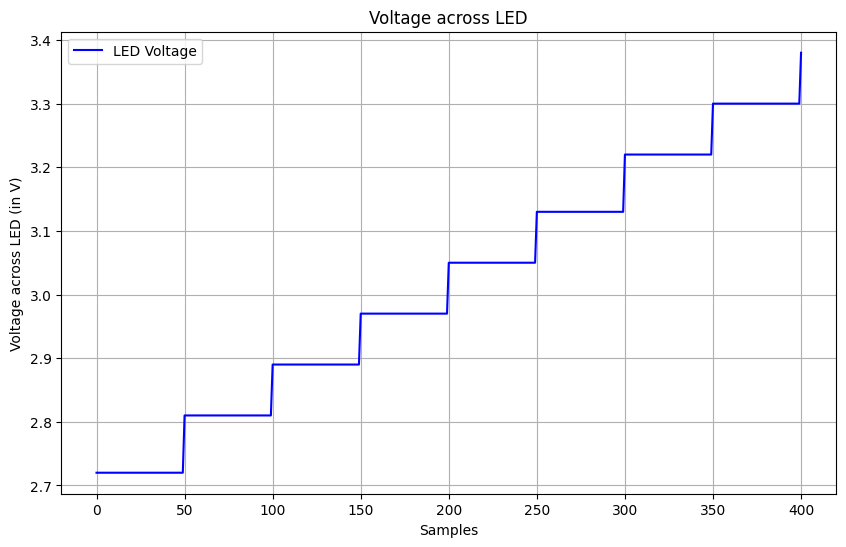

In [32]:
import matplotlib.pyplot as plt
import csv

read_data_from_csv = 0
file_name = 'diode_data.csv'

# Initialize empty lists to store each column
voltage_across_led = []
pd_current = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        print("Reading data ...", end= "")
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                print(".", end = "")
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print()
                    print("Received stop command.")
                    break
    
                # Split the line by commas
                values = line.split(',')
                # Check if we received exactly 3 values
                if len(values) == 2:
                    # Append each value to the respective list
                    voltage_across_led.append(float(values[0]))
                    pd_current.append(float(values[1]))
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open(file_name, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            voltage_across_led.append(float(row[0]))
            pd_current.append(float(row[1]))




plt.figure(figsize=(10, 6))
plt.plot(pd_current, label='PD current', color='blue')
plt.xlabel('Samples')
plt.ylabel('Current through PD (in nA)')
plt.title('Current through PD')
plt.legend()
plt.grid(True);
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(voltage_across_led, label='LED Voltage', color='blue')
plt.xlabel('Samples')
plt.ylabel('Voltage across LED (in V)')
plt.title('Voltage across LED')
plt.legend()
plt.grid(True);
plt.show()
